# SENTIMENT ANALYSIS AND CLASSIFICATION PROJECT

# Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






# Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [137]:
!pip install matplotlib -Uq

     |████████████████████████████████| 11.2 MB 5.1 MB/s 
     |████████████████████████████████| 965 kB 46.0 MB/s 


In [4]:
import gdown
# same as the above, but with the file ID
id = "17YTKGaSbl8KyAu-OENrDnWBVcUYDY_EQ" # id: Womens Clothin...csv
output = 'Womens Clothing E-Commerce Reviews.csv' # download colab
gdown.download(id=id, output=output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=17YTKGaSbl8KyAu-OENrDnWBVcUYDY_EQ
To: /content/Womens Clothing E-Commerce Reviews.csv
100%|██████████| 8.48M/8.48M [00:00<00:00, 42.1MB/s]


'Womens Clothing E-Commerce Reviews.csv'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer


import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [65]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [66]:
df_origin = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df = df_origin.copy()
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [8]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [9]:
df.duplicated().sum()

0

### Data Wrangling

In [10]:
df.groupby("Rating")["Recommended IND"].value_counts()

Rating  Recommended IND
1       0                    826
        1                     16
2       0                   1471
        1                     94
3       0                   1682
        1                   1189
4       1                   4909
        0                    168
5       1                  13106
        0                     25
Name: Recommended IND, dtype: int64

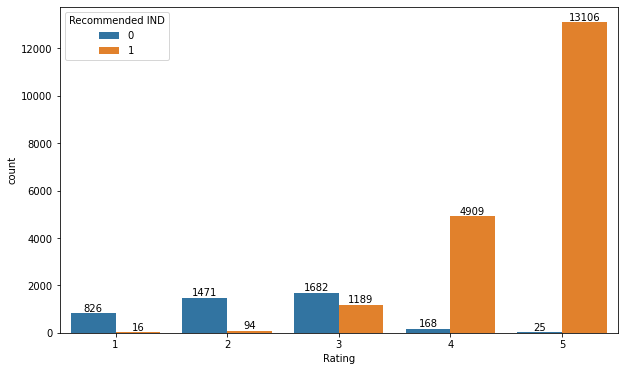

In [11]:
ax = sns.countplot(data = df, x ="Rating", hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [12]:
df["Recommended IND"].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

[Text(0, 0, '4172'), Text(0, 0, '19314')]

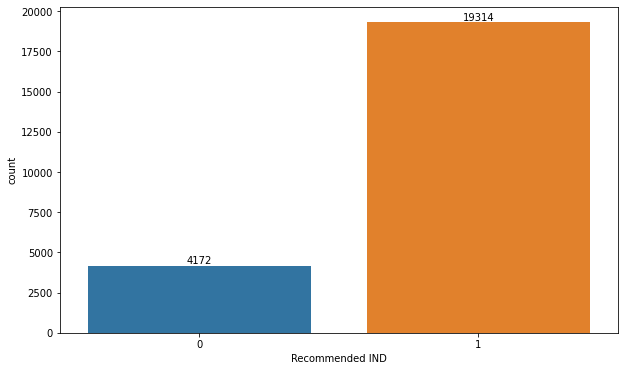

In [13]:
ax = sns.countplot(data = df, x = "Recommended IND")
ax.bar_label(ax.containers[0])

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [67]:
df = df[["Review Text", "Recommended IND"]]
df.rename(columns={"Review Text": "Review_Text", "Recommended IND": "Recommended_IND"}, inplace=True)
df.head()

,Review_Text,Recommended_IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review_Text      22641 non-null  object
 1   Recommended_IND  23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 367.1+ KB


In [68]:
df.Recommended_IND = df.Recommended_IND.map({1:0, 0:1})
df.Recommended_IND.value_counts()

0    19314
1     4172
Name: Recommended_IND, dtype: int64

### Missing Value Detection

In [69]:
df.isnull().sum()

Review_Text        845
Recommended_IND      0
dtype: int64

In [70]:
df.dropna(inplace=True)
df = df.reset_index(drop=True)

In [71]:
df_copy1 = df.copy()

## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [72]:
df.Review_Text[350]

'Very comfy and light. can be casual with jeans and boots or dress it up with a nice necklace and pencil skirt.'

In [73]:
stop_words = stopwords.words('english')

for i in ["not", "no"]:
        stop_words.remove(i)

In [74]:
def cleaning(data):
    #1. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")
    #2. Tokenize
    text_tokens = word_tokenize(data.lower())
    #3. Remove Puncs and number
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    #5. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    #joining
    return " ".join(text_cleaned)

In [75]:
df["Review_Text"] = df["Review_Text"].apply(cleaning)
df["Review_Text"].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: Review_Text, dtype: object

In [24]:
df.to_csv("/content/drive/MyDrive/NLP_Project.csv")

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [25]:
df_negative = df[df.Recommended_IND == 1]
df_negative.head()

,Review_Text,Recommended_IND
2,high hope dress really wanted work initially o...,1
5,love tracy reese dress one not petite foot tal...,1
10,dress run small esp zipper area run ordered sp...,1
22,first not pullover styling side zipper wouldnt...,1
25,loved material didnt really look long dress pu...,1


In [26]:
df_positive = df[df.Recommended_IND == 0]
df_positive.head()

,Review_Text,Recommended_IND
0,absolutely wonderful silky sexy comfortable,0
1,love dress sooo pretty happened find store im ...,0
3,love love love jumpsuit fun flirty fabulous ev...,0
4,shirt flattering due adjustable front tie perf...,0
6,aded basket hte last mintue see would look lik...,0


### Collect Words (positive and negative separately)

In [27]:
positive_words = " ".join(df_positive.Review_Text)
positive_words[:250]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite love love love jumpsuit f'

In [28]:
negative_words = " ".join(df_negative.Review_Text)
negative_words[:250]

'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer im'

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [29]:
# !pip install wordcloud

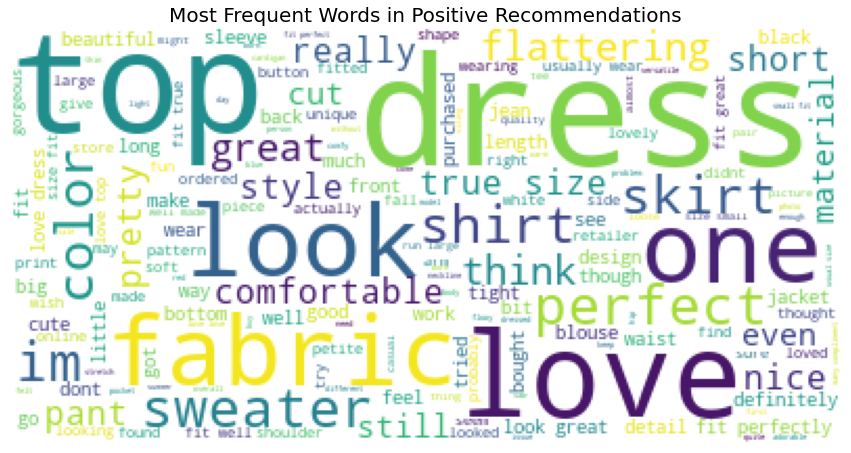

In [30]:
from wordcloud import WordCloud
worldcloud = WordCloud(background_color="white", max_words =250)
worldcloud.generate(positive_words)

import matplotlib.pyplot as plt
plt.figure(figsize = (15,15))
plt.imshow(worldcloud)
plt.title("Most Frequent Words in Positive Recommendations", fontdict={"size": 20})
plt.axis("off")
plt.show()

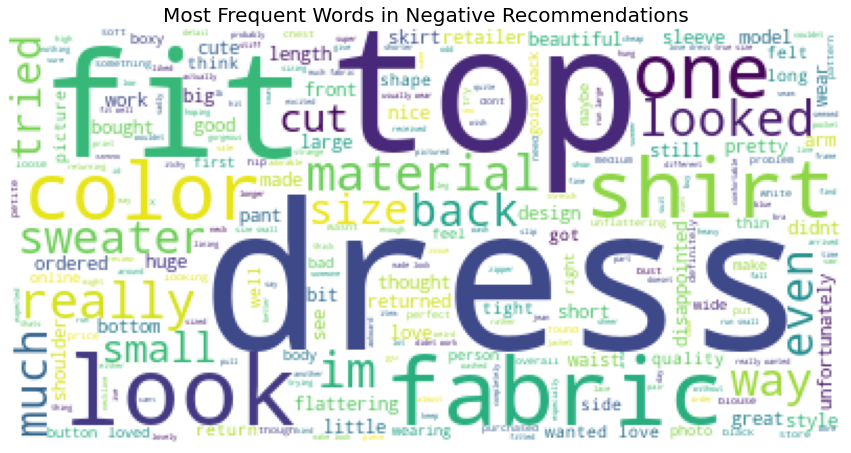

In [31]:
worldcloud.generate(negative_words)

import matplotlib.pyplot as plt
plt.figure(figsize = (15,15))
plt.imshow(worldcloud)
plt.title("Most Frequent Words in Negative Recommendations", fontdict={"size": 20})
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [32]:
# df = pd.read_csv("/content/drive/MyDrive/NLP_Project.csv")
# df.head()

In [76]:
from sklearn.model_selection import train_test_split
X = df["Review_Text"]
y= df["Recommended_IND"]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [78]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [37]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,abstract,absurd,abt,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,accept,acceptable,access,accessorize,...,yikes,yo,yoga,yoke,york,youd,youll,young,younger,youre,youthful,youve,yr,yuck,yucky,yummy,zero,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20372,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20373,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20374,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)            
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [39]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,abstract,absurd,abt,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,accept,acceptable,access,accessorize,...,yikes,yo,yoga,yoke,york,youd,youll,young,younger,youre,youthful,youve,yr,yuck,yucky,yummy,zero,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.148984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20371,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20372,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20373,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20374,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Logistic Regression

### CountVectorizer

In [82]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log.fit(X_train_count,y_train)

print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[1638  217]
 [  67  343]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1855
           1       0.61      0.84      0.71       410

    accuracy                           0.87      2265
   macro avg       0.79      0.86      0.81      2265
weighted avg       0.90      0.87      0.88      2265

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     16685
           1       0.73      0.97      0.83      3691

    accuracy                           0.93     20376
   macro avg       0.86      0.94      0.89     20376
weighted avg       0.94      0.93      0.93     20376



In [47]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

model = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
scores = cross_validate(model, X_train_count, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.605362
train_precision    0.735242
test_recall        0.781359
train_recall       0.968060
test_f1            0.682090
train_f1           0.835735
test_accuracy      0.868031
train_accuracy     0.931063
dtype: float64

In [48]:
log = LogisticRegression(C=0.01, max_iter=1000, class_weight="balanced", random_state=42)
log.fit(X_train_count,y_train)

print("LOG MODEL with C=0.01")
eval(log, X_train_count, X_test_count)

LOG MODEL with C=0.01
[[1588  267]
 [  52  358]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1855
           1       0.57      0.87      0.69       410

    accuracy                           0.86      2265
   macro avg       0.77      0.86      0.80      2265
weighted avg       0.90      0.86      0.87      2265

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     16685
           1       0.57      0.88      0.70      3691

    accuracy                           0.86     20376
   macro avg       0.77      0.87      0.80     20376
weighted avg       0.90      0.86      0.87     20376



In [49]:
model = LogisticRegression(C=0.01, max_iter=1000, class_weight="balanced", random_state=42)
scores = cross_validate(model, X_train_count, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.553957
train_precision    0.574222
test_recall        0.845836
train_recall       0.882898
test_f1            0.669213
train_f1           0.695862
test_accuracy      0.848400
train_accuracy     0.860195
dtype: float64

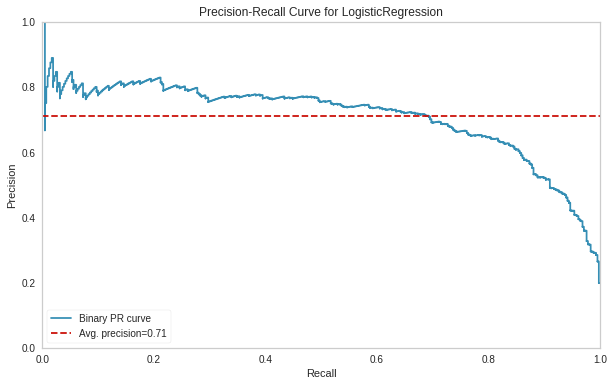

In [83]:
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.metrics import PrecisionRecallDisplay, f1_score, recall_score, average_precision_score

viz = PrecisionRecallCurve( LogisticRegression(C = 0.01, max_iter=1000, class_weight="balanced", random_state=42),
    per_class=True, cmap="Set1")
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [84]:
log = LogisticRegression(C=0.01, max_iter=1000, class_weight="balanced", random_state=42).fit(X_train_count,y_train)

y_pred = log.predict(X_test_count)
log_count_rec_neg = recall_score(y_test, y_pred, average = 'binary') 
log_count_f1_neg = f1_score(y_test, y_pred, average = 'binary')
log_count_AP = viz.score_

### TF-IDF

In [70]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
log.fit(X_train_tf_idf,y_train)

print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[1621  234]
 [  53  357]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1855
           1       0.60      0.87      0.71       410

    accuracy                           0.87      2265
   macro avg       0.79      0.87      0.82      2265
weighted avg       0.90      0.87      0.88      2265

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     16685
           1       0.64      0.93      0.76      3691

    accuracy                           0.89     20376
   macro avg       0.81      0.91      0.85     20376
weighted avg       0.92      0.89      0.90     20376



In [71]:
model = LogisticRegression(max_iter=1000, class_weight="balanced", C=0.2, random_state=42)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.562638
train_precision    0.589341
test_recall        0.857219
train_recall       0.902134
test_f1            0.679183
train_f1           0.712935
test_accuracy      0.853210
train_accuracy     0.868396
dtype: float64

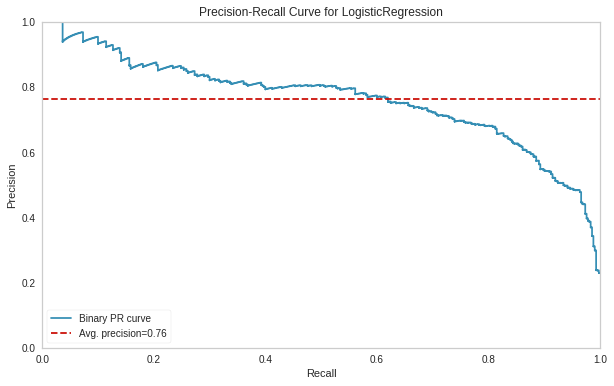

In [85]:
viz = PrecisionRecallCurve(LogisticRegression(C= 0.2, max_iter=1000, class_weight="balanced", random_state=42),per_class=True)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [86]:
log = LogisticRegression(C= 0.2, max_iter=1000, class_weight="balanced", random_state=42).fit(X_train_tf_idf, y_train)

y_pred = log.predict(X_test_tf_idf)
log_tfidf_rec_neg = recall_score(y_test, y_pred, average = 'binary') # burada tek label kullanıldığı için average None anlamsız. Eğer birden fazla label olsaydı o zaman average olarak macro, micro veya weighted kullanmak anlamlı olurdu. 
log_tfidf_f1_neg = f1_score(y_test, y_pred, average = 'binary')
log_tfidf_AP = viz.score_

## Naive Bayes 

### Countvectorizer

In [87]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([2.76022758, 2.76022758, 2.76022758, ..., 0.61060833, 0.61060833,
       0.61060833])

In [88]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB(alpha=1)  
nb.fit(X_train_count, y_train, sample_weight=classes_weights)

print("NB MODEL with CountVectorizer")
eval(nb, X_train_count, X_test_count)

NB MODEL with CountVectorizer
[[1592  263]
 [  51  359]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1855
           1       0.58      0.88      0.70       410

    accuracy                           0.86      2265
   macro avg       0.77      0.87      0.80      2265
weighted avg       0.90      0.86      0.87      2265

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     16685
           1       0.60      0.91      0.73      3691

    accuracy                           0.88     20376
   macro avg       0.79      0.89      0.82     20376
weighted avg       0.91      0.88      0.88     20376



In [75]:
model = MultinomialNB(alpha=1)
scores = cross_validate(model, X_train_count, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.572928
train_precision    0.606420
test_recall        0.859925
train_recall       0.914146
test_f1            0.687531
train_f1           0.729144
test_accuracy      0.858411
train_accuracy     0.876974
dtype: float64

In [83]:
model = BernoulliNB(alpha=1)
scores = cross_validate(model, X_train_count, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.572872
train_precision    0.608196
test_recall        0.857219
train_recall       0.915229
test_f1            0.686627
train_f1           0.730772
test_accuracy      0.858215
train_accuracy     0.877841
dtype: float64

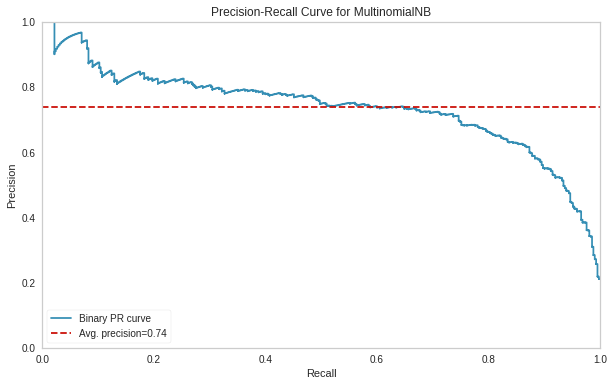

In [89]:
viz = PrecisionRecallCurve(
    MultinomialNB(alpha=1),
    classes=nb.classes_,  # grafikte class isimleri ile birlikte score lar gelsin diye 
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [90]:
nb = MultinomialNB(alpha=1).fit(X_train_count, y_train)

y_pred = nb.predict(X_test_count)
nb_count_rec_neg = recall_score(y_test, y_pred, average = 'binary')
nb_count_f1_neg = f1_score(y_test, y_pred, average = 'binary')
nb_count_AP = viz.score_

### TF-IDF

In [84]:
nb = MultinomialNB(alpha=1)
nb.fit(X_train_tf_idf, y_train, sample_weight=classes_weights)

print("NB MODEL with CountVectorizer")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL with CountVectorizer
[[1560  295]
 [  47  363]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      1855
           1       0.55      0.89      0.68       410

    accuracy                           0.85      2265
   macro avg       0.76      0.86      0.79      2265
weighted avg       0.89      0.85      0.86      2265

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.86      0.92     16685
           1       0.59      0.92      0.72      3691

    accuracy                           0.87     20376
   macro avg       0.79      0.89      0.82     20376
weighted avg       0.91      0.87      0.88     20376



In [85]:
model = MultinomialNB(alpha=1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.558401
train_precision    0.594596
test_recall        0.865617
train_recall       0.919654
test_f1            0.678774
train_f1           0.722233
test_accuracy      0.851590
train_accuracy     0.871859
dtype: float64

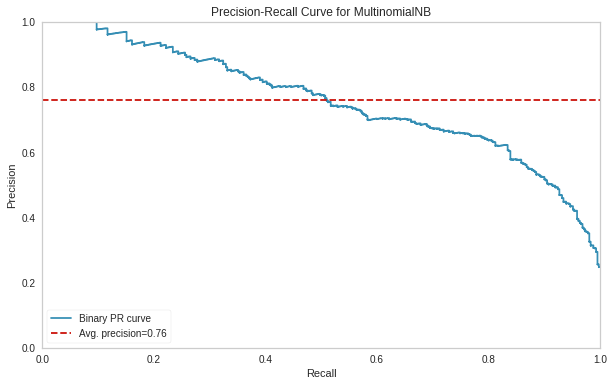

In [91]:
viz = PrecisionRecallCurve(
    MultinomialNB(alpha=1),
    classes=nb.classes_, 
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [92]:
nb = MultinomialNB(alpha=1).fit(X_train_tf_idf, y_train)

y_pred = nb.predict(X_test_tf_idf)
nb_tfidf_rec_neg = recall_score(y_test, y_pred, average = 'binary')
nb_tfidf_f1_neg = f1_score(y_test, y_pred, average = 'binary')
nb_tfidf_AP = viz.score_

## Support Vector Machine (SVM)

### Countvectorizer

In [93]:
from sklearn.svm import LinearSVC  # daha az maliyetli olduğu için linearSVC tercih edildi.
svc = LinearSVC(class_weight="balanced", random_state=42)
svc.fit(X_train_count,y_train)

print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[1632  223]
 [  89  321]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1855
           1       0.59      0.78      0.67       410

    accuracy                           0.86      2265
   macro avg       0.77      0.83      0.79      2265
weighted avg       0.88      0.86      0.87      2265

Train_Set
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     16685
           1       0.81      0.98      0.88      3691

    accuracy                           0.95     20376
   macro avg       0.90      0.96      0.93     20376
weighted avg       0.96      0.95      0.96     20376



In [92]:
model = LinearSVC(class_weight="balanced", random_state=42, C= 0.001)
scores = cross_validate(model, X_train_count, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.553968
train_precision    0.575269
test_recall        0.847190
train_recall       0.886300
test_f1            0.669692
train_f1           0.697684
test_accuracy      0.848498
train_accuracy     0.860860
dtype: float64

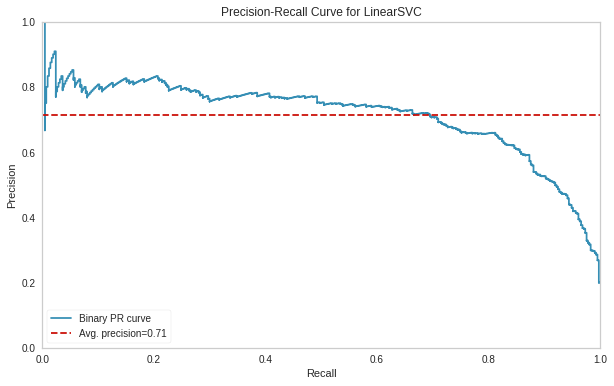

In [94]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.001, class_weight="balanced", random_state=42),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [95]:
svc = LinearSVC(C=0.001, class_weight="balanced", random_state=42).fit(X_train_count, y_train)

y_pred = svc.predict(X_test_count)
svc_count_rec_neg = recall_score(y_test, y_pred, average = 'binary')
svc_count_f1_neg = f1_score(y_test, y_pred, average = 'binary')
svc_count_AP = viz.score_

### TD-IDF

In [99]:
from sklearn.svm import LinearSVC 
svc = LinearSVC(class_weight="balanced", random_state=42, C=0.01)
svc.fit(X_train_tf_idf,y_train)

print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[1573  282]
 [  48  362]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1855
           1       0.56      0.88      0.69       410

    accuracy                           0.85      2265
   macro avg       0.77      0.87      0.80      2265
weighted avg       0.90      0.85      0.87      2265

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     16685
           1       0.56      0.89      0.69      3691

    accuracy                           0.86     20376
   macro avg       0.77      0.87      0.80     20376
weighted avg       0.90      0.86      0.87     20376



In [98]:
model = LinearSVC(C=0.01, class_weight="balanced", random_state=42)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.545192
train_precision    0.563298
test_recall        0.863178
train_recall       0.893916
test_f1            0.668062
train_f1           0.691099
test_accuracy      0.844523
train_accuracy     0.855244
dtype: float64

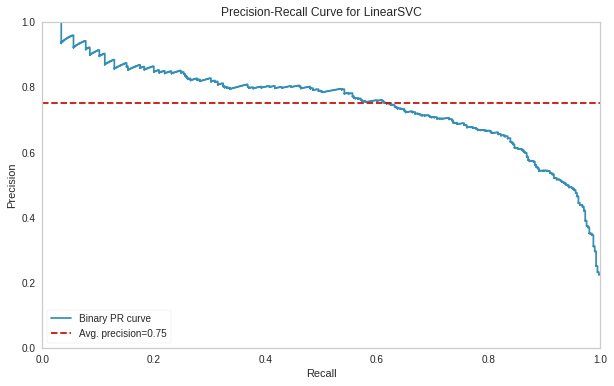

In [96]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.01, class_weight="balanced", random_state=42),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [97]:
svc = LinearSVC(C=0.01, class_weight="balanced", random_state=42).fit(X_train_tf_idf, y_train)

y_pred = svc .predict(X_test_tf_idf)
svc_tfidf_rec_neg = recall_score(y_test, y_pred, average = 'binary')
svc_tfidf_f1_neg = f1_score(y_test, y_pred, average = 'binary')
svc_tfidf_AP = viz.score_

## Random Forest

### Countvectorizer

In [98]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth= 5, class_weight="balanced", random_state = 42, n_jobs = -1)
rf.fit(X_train_count, y_train)

print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[1544  311]
 [  66  344]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1855
           1       0.53      0.84      0.65       410

    accuracy                           0.83      2265
   macro avg       0.74      0.84      0.77      2265
weighted avg       0.88      0.83      0.85      2265

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.82      0.89     16685
           1       0.51      0.85      0.64      3691

    accuracy                           0.83     20376
   macro avg       0.74      0.83      0.76     20376
weighted avg       0.88      0.83      0.84     20376



In [106]:
model = RandomForestClassifier(n_estimators=100, max_depth= 5, class_weight="balanced", random_state = 42, n_jobs = -1)
scores = cross_validate(model, X_train_count, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.490104
train_precision    0.508886
test_recall        0.821458
train_recall       0.852073
test_f1            0.613746
train_f1           0.637131
test_accuracy      0.812525
train_accuracy     0.824139
dtype: float64

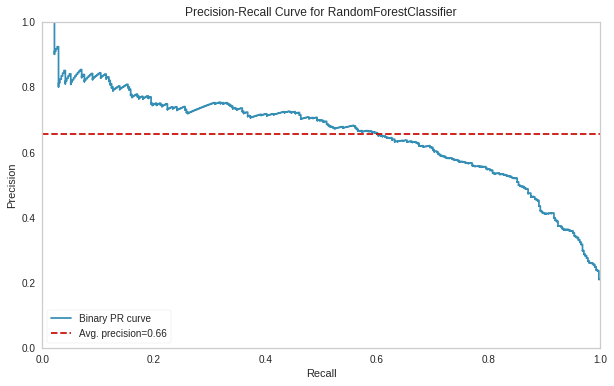

In [99]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(n_estimators=100, max_depth= 5, class_weight="balanced", random_state = 42, n_jobs = -1),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [100]:
rf = RandomForestClassifier(n_estimators=100, max_depth= 5, class_weight="balanced", random_state = 42, n_jobs = -1).fit(X_train_count, y_train)

y_pred = rf.predict(X_test_count)
rf_count_rec_neg = recall_score(y_test, y_pred, average = 'binary')
rf_count_f1_neg = f1_score(y_test, y_pred, average = 'binary')
rf_count_AP = viz.score_

### TF-IDF

In [110]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth= 5, class_weight="balanced", random_state = 42, n_jobs = -1)
rf.fit(X_train_tf_idf, y_train)

print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[1539  316]
 [  75  335]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      1855
           1       0.51      0.82      0.63       410

    accuracy                           0.83      2265
   macro avg       0.73      0.82      0.76      2265
weighted avg       0.87      0.83      0.84      2265

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.82      0.89     16685
           1       0.52      0.85      0.65      3691

    accuracy                           0.83     20376
   macro avg       0.74      0.84      0.77     20376
weighted avg       0.88      0.83      0.84     20376



In [111]:
model = RandomForestClassifier(n_estimators=100, max_depth= 5, class_weight="balanced", random_state = 42, n_jobs = -1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.474407
train_precision    0.498523
test_recall        0.822277
train_recall       0.866041
test_f1            0.601312
train_f1           0.632683
test_accuracy      0.802169
train_accuracy     0.817781
dtype: float64

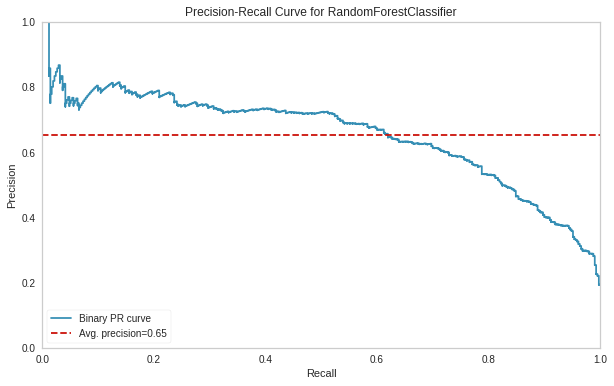

In [101]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(n_estimators=100, max_depth= 5, class_weight="balanced", random_state = 42, n_jobs = -1),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [102]:
rf = RandomForestClassifier(n_estimators=100, max_depth= 5, class_weight="balanced", random_state = 42, n_jobs = -1).fit(X_train_tf_idf, y_train)

y_pred = rf.predict(X_test_tf_idf)
rf_tfidf_rec_neg = recall_score(y_test, y_pred, average = 'binary')
rf_tfidf_f1_neg = f1_score(y_test, y_pred, average = 'binary')
rf_tfidf_AP = viz.score_

## Ada Boosting

### Countvectorizer

In [103]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state = 42)
ada.fit(X_train_count, y_train, sample_weight=classes_weights)

print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[1549  306]
 [  81  329]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1855
           1       0.52      0.80      0.63       410

    accuracy                           0.83      2265
   macro avg       0.73      0.82      0.76      2265
weighted avg       0.87      0.83      0.84      2265

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.83      0.88     16685
           1       0.50      0.79      0.61      3691

    accuracy                           0.82     20376
   macro avg       0.73      0.81      0.75     20376
weighted avg       0.87      0.82      0.84     20376



In [117]:
model = AdaBoostClassifier(random_state = 42)
scores = cross_validate(model, X_train_count, y_train,
                        scoring = ['precision','recall','f1','accuracy'],
                        cv = 10,
                        return_train_score=True,
                        fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.496656
train_precision    0.503354
test_recall        0.771610
train_recall       0.783377
test_f1            0.604281
train_f1           0.612889
test_accuracy      0.816991
train_accuracy     0.820737
dtype: float64

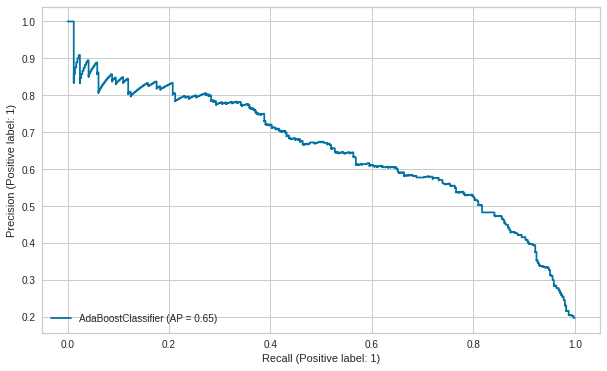

In [104]:
model = AdaBoostClassifier(random_state = 42)
model.fit(X_train_count, y_train, sample_weight=classes_weights)

PrecisionRecallDisplay.from_estimator(model, X_test_count, y_test, pos_label=1)
plt.show()

In [105]:
ada = AdaBoostClassifier(random_state = 42).fit(X_train_count, y_train, sample_weight=classes_weights)

y_pred = ada.predict(X_test_count)
y_pred_proba = ada.predict_proba(X_test_count)
ada_count_rec_neg = recall_score(y_test, y_pred, average = 'binary')
ada_count_f1_neg = f1_score(y_test, y_pred, average = 'binary')
ada_count_AP = average_precision_score(y_test, y_pred_proba[:,1])

### TF-IDF

In [120]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state = 42)
ada.fit(X_train_tf_idf, y_train, sample_weight=classes_weights)

print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[1547  308]
 [  82  328]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      1855
           1       0.52      0.80      0.63       410

    accuracy                           0.83      2265
   macro avg       0.73      0.82      0.76      2265
weighted avg       0.87      0.83      0.84      2265

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.83      0.88     16685
           1       0.50      0.78      0.61      3691

    accuracy                           0.82     20376
   macro avg       0.72      0.81      0.75     20376
weighted avg       0.87      0.82      0.83     20376



In [121]:
model = AdaBoostClassifier(random_state = 42)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.464094
train_precision    0.482535
test_recall        0.776752
train_recall       0.804209
test_f1            0.580786
train_f1           0.602786
test_accuracy      0.796722
train_accuracy     0.807829
dtype: float64

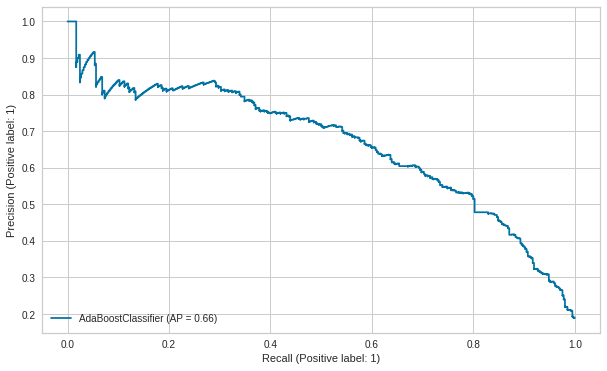

In [106]:
model = AdaBoostClassifier(random_state = 42)
model.fit(X_train_tf_idf, y_train, sample_weight=classes_weights)

PrecisionRecallDisplay.from_estimator(model, X_test_tf_idf, y_test, pos_label=1)
plt.show()

In [107]:
ada = AdaBoostClassifier(random_state = 42).fit(X_train_tf_idf, y_train, sample_weight=classes_weights)

y_pred = ada.predict(X_test_tf_idf)
y_pred_proba = ada.predict_proba(X_test_tf_idf)
ada_tfidf_rec_neg = recall_score(y_test, y_pred, average = 'binary')
ada_tfidf_f1_neg = f1_score(y_test, y_pred, average = 'binary')
ada_tfidf_AP = average_precision_score(y_test, y_pred_proba[:,1])

## DL modeling

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

X = df_copy1["Review_Text"]
y = df_copy1["Recommended_IND"]

### Tokenization

In [109]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

### Creating word index

In [110]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [111]:
print(len(tokenizer.word_index))
num_words = len(tokenizer.index_word)+1

14847


### Converting tokens to numeric

In [112]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [113]:
print(X[35])
print(X_num_tokens[35])

Wouldn't have given them a second look but tried them on in store of a whim. love, love!!
[506, 24, 930, 85, 4, 623, 48, 10, 104, 85, 11, 9, 106, 13, 4, 1184, 21, 21]


### Maximum number of tokens for all documents¶

In [114]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [115]:
arr = num_tokens
 
print("Descriptive analysis")
print("Document Size \t=", arr.shape[0])
print("Doc Token Count\t=", arr)

# measures of central tendency
print("Measures of Central Tendency")
print("Mean \t\t=", arr.mean())
print("Median \t\t=", np.median(arr))
print("Mode \t\t=", stats.mode(arr)[0][0])

# measures of dispersion
print("Measures of Dispersion")
print("Minimum \t=", arr.min())
print("Maximum \t=", arr.max())
print("Range \t\t=", arr.ptp())
print("Variance \t=", arr.var())
print("Standard Deviation =", arr.std())

Descriptive analysis
Document Size 	= 22641
Doc Token Count	= [ 7 62 97 ... 42 85 19]
Measures of Central Tendency
Mean 		= 60.60699615741354
Median 		= 59.0
Mode 		= 96
Measures of Dispersion
Minimum 	= 2
Maximum 	= 116
Range 		= 114
Variance 	= 829.4561658852818
Standard Deviation = 28.80028065636309


In [116]:
num_tokens.argmax() 

16263

In [117]:
X[16263]

"I love maeve tops. i love the material and feel of this brand. when i saw the new tops that came out i ran to my local store to try one on. i'm usually a large in a top, once in a while an xl. they only had a large to try so i tried it in the black motif.\ni could barely get the top on. it looked like i was missing 1/2 of the top. i doubled checked the size and it was a large.\nit's a shame, the top is really cute. if you are the least bit broad or busty, go up a size or two. if you are usually a"

In [118]:
sum(num_tokens < 105) / len(num_tokens)

0.976811978269511

In [119]:
max_tokens = 105

### Fixing token counts of all documents (pad_sequences)

In [120]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)
X_pad.shape

(22641, 105)

In [121]:
print(X_num_tokens[35])
print(X_pad[35])


[506, 24, 930, 85, 4, 623, 48, 10, 104, 85, 11, 9, 106, 13, 4, 1184, 21, 21]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0  506   24  930   85    4  623   48   10  104   85   11
    9  106   13    4 1184   21   21]


### Train Set Split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=42)

### Modeling

In [123]:
embedding_size = 50

model = Sequential()

model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size, 
                    input_length=max_tokens))

model.add(Dropout(0.5))

model.add(GRU(units=64, return_sequences=True))
# model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(GRU(units=32, return_sequences=True))
# model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(GRU(units=16))
# model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['Recall'])

early_stop = EarlyStopping(monitor="val_recall", mode="max", verbose=1, patience = 1, restore_best_weights=True)

In [124]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([2.76022758, 0.61060833])

In [125]:
model.fit(X_train, y_train, epochs=10, batch_size=32, sample_weight= classes_weights, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
637/637 [==============================] - 87s 125ms/step - loss: 0.4841 - recall: 0.7719 - val_loss: 0.3716 - val_recall: 0.9195
Epoch 2/10
637/637 [==============================] - 78s 122ms/step - loss: 0.3250 - recall: 0.8992 - val_loss: 0.3526 - val_recall: 0.9244
Epoch 3/10
637/637 [==============================] - 79s 124ms/step - loss: 0.2782 - recall: 0.9212 - val_loss: 0.4952 - val_recall: 0.9415
Epoch 4/10
637/637 [==============================] - 79s 123ms/step - loss: 0.2389 - recall: 0.9423 - val_loss: 0.2956 - val_recall: 0.8537
Epoch 4: early stopping


In [126]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.484110,0.771878,0.371577,0.919512
1,0.325012,0.899214,0.352577,0.924390
2,0.278221,0.921160,0.495196,0.941463
3,0.238881,0.942292,0.295648,0.853659


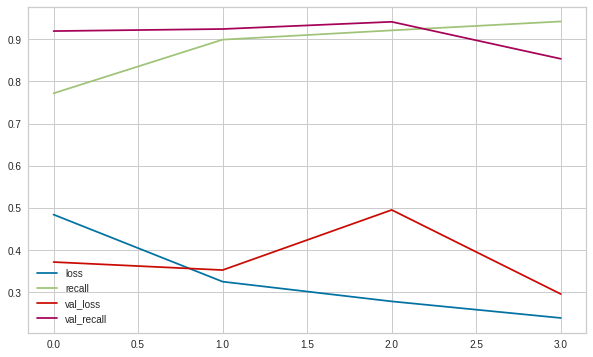

In [127]:
model_loss.plot()

In [128]:
model.evaluate(X_test, y_test)

71/71 [==============================] - 2s 27ms/step - loss: 0.4952 - recall: 0.9415


[0.4951957166194916, 0.9414634108543396]

In [129]:
model.evaluate(X_train, y_train)

637/637 [==============================] - 17s 26ms/step - loss: 0.4197 - recall: 0.9889


[0.41969040036201477, 0.9888918995857239]

In [130]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_pred = model.predict(X_test) >= 0.5
y_train_pred = model.predict(X_train) >= 0.5

print("Test Result")
print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))
print("###"*20)
print("Train Result")
print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

637/637 [==============================] - 13s 20ms/step
Test Result
[[1332  523]
 [  24  386]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.72      0.83      1855
           1       0.42      0.94      0.59       410

    accuracy                           0.76      2265
   macro avg       0.70      0.83      0.71      2265
weighted avg       0.88      0.76      0.79      2265

############################################################
Train Result
[[12728  3957]
 [   41  3650]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.76      0.86     16685
           1       0.48      0.99      0.65      3691

    accuracy                           0.80     20376
   macro avg       0.74      0.88      0.76     20376
weighted avg       0.90      0.80      0.82     20376



71/71 [==============================] - 1s 20ms/step


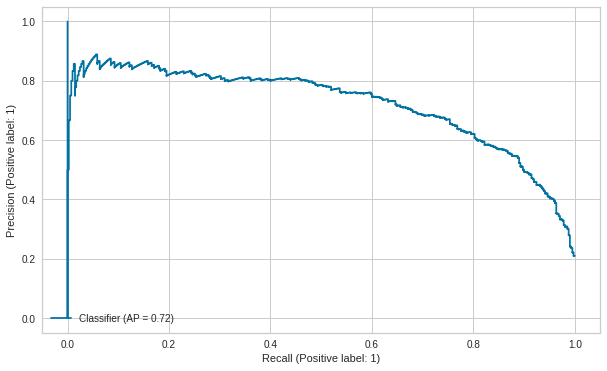

In [131]:
y_pred_proba = model.predict(X_test)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show()

In [133]:
model.save('DL_model_sentiment.h5')

In [132]:
# from tensorflow.keras.models import load_model
# model = load_model('/content/drive/MyDrive/NLP/DL_model_sentiment.h5')

y_pred = (model.predict(X_test) > 0.5).astype("int")
y_pred_proba = model.predict(X_test)
DL_rec_neg = recall_score(y_test, y_pred, average = 'binary')
DL_f1_neg = f1_score(y_test, y_pred, average = 'binary')
DL_AP = average_precision_score(y_test, y_pred_proba)

71/71 [==============================] - 1s 20ms/step


## BERT Modeling

In [1]:
import tensorflow as tf
import os

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [2]:
strategy = tf.distribute.TPUStrategy(resolver)

In [3]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 4.1 MB/s 
     |████████████████████████████████| 7.6 MB 60.9 MB/s 
     |████████████████████████████████| 163 kB 73.0 MB/s 


In [14]:
X = df_copy1['Review_Text'].values
y = df_copy1['Recommended_IND'].values

### Tokenization

In [15]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [16]:
max_token = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    max_token.append(len(input_ids))

print('Max sentence length: ', max(max_token))

Max sentence length:  162


In [17]:
arr = np.array(max_token)
 
print("Descriptive analysis")
print("Document Size \t=", arr.shape[0])
print("Doc Token Count\t=", arr)

# measures of central tendency
print("Measures of Central Tendency")
print("Mean \t\t=", arr.mean())
print("Median \t\t=", np.median(arr))
print("Mode \t\t=", stats.mode(arr)[0][0])

# measures of dispersion
print("Measures of Dispersion")
print("Minimum \t=", arr.min())
print("Maximum \t=", arr.max())
print("Range \t\t=", arr.ptp())
print("Variance \t=", arr.var())
print("Standard Deviation =", arr.std())

Descriptive analysis
Document Size 	= 22641
Doc Token Count	= [ 10  82 118 ...  54 102  26]
Measures of Central Tendency
Mean 		= 76.75659202332052
Median 		= 75.0
Mode 		= 122
Measures of Dispersion
Minimum 	= 4
Maximum 	= 162
Range 		= 158
Variance 	= 1251.4350770125225
Standard Deviation = 35.37562829141728


### Train test split

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

### Transformation text to tensor

In [19]:
def transformation(X):
  # set array dimensions
  seq_len = 162
  num_samples = len(X)

  # initialize empty zero arrays
  Xids = np.zeros((num_samples, seq_len))
  Xmask = np.zeros((num_samples, seq_len))

    
  for i, phrase in enumerate(X):
      tokens = tokenizer.encode_plus(phrase, max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True) 
      
      # assign tokenized outputs to respective rows in numpy arrays
      Xids[i] = tokens['input_ids']
      Xmask[i] = tokens['attention_mask']
  return Xids, Xmask

In [20]:
Xids_train, Xmask_train = transformation(X_train)

Xids_test, Xmask_test = transformation(X_test)

In [21]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (20376, 162)
Xmask_train.shape : (20376, 162)
Xids_test.shape   : (2265, 162)
Xmask_test.shape  : (2265, 162)


In [22]:
labels_train = y_train.reshape(-1,1)
labels_train

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [23]:
labels_test = y_test.reshape(-1,1)
labels_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [24]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, labels_train))
dataset_train

<TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [25]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, labels_test))
dataset_test

<TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [26]:
def map_func(Xids, Xmask, labels):
    return {'input_ids': Xids, 'attention_mask': Xmask}, labels

In [27]:
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [28]:
dataset_train

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.float64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [29]:
dataset_test

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.float64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [30]:
batch_size = 32 
train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)

length = len(X_train)
train_ds2 = dataset_train.shuffle(buffer_size = length, reshuffle_each_iteration=True).batch(batch_size)

### Creating Model

In [31]:
def create_model():
    seq_len =162
    from transformers import TFAutoModel
    model = TFAutoModel.from_pretrained("bert-base-uncased")
    input_ids = tf.keras.layers.Input(shape=(seq_len,), name='input_ids', dtype='int32') 
    attention_mask = tf.keras.layers.Input(shape=(seq_len,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] 

    x = tf.keras.layers.Dense(seq_len, activation='relu')(embeddings) 
    x = tf.keras.layers.Dropout(0.1, name="dropout")(x)
    y = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(x)

    return tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)

In [32]:
with strategy.scope():  # TPU hızlandırıcısını kullanmak için
  
  optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
  loss = tf.keras.losses.BinaryCrossentropy()
  recall = tf.keras.metrics.Recall()
  model2 = create_model()
  model2.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [33]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 162)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 162)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 162,                                           

In [37]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([2.76022758, 0.61060833])

In [40]:
history = model2.fit(train_ds2, validation_data= val_ds, class_weight= {0:0.61, 1:2.76}, epochs=1)

637/637 [==============================] - 230s 192ms/step - loss: 0.2962 - recall: 0.8981 - val_loss: 0.3629 - val_recall: 0.9780


### Model evaluation

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model2.predict(val_ds) >= 0.5

print(classification_report(y_test, y_pred))

71/71 [==============================] - 12s 104ms/step
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      1855
           1       0.55      0.98      0.71       410

    accuracy                           0.85      2265
   macro avg       0.77      0.90      0.81      2265
weighted avg       0.91      0.85      0.87      2265



In [42]:
y_train_pred = model2.predict(train_ds) >= 0.5  # prediction da train_ds, eğitimde train_ds2 kullanılmalı.


print(classification_report(y_train, y_train_pred)) 

637/637 [==============================] - 25s 37ms/step
              precision    recall  f1-score   support

           0       1.00      0.84      0.91     16685
           1       0.58      0.99      0.73      3691

    accuracy                           0.87     20376
   macro avg       0.79      0.92      0.82     20376
weighted avg       0.92      0.87      0.88     20376



71/71 [==============================] - 3s 30ms/step


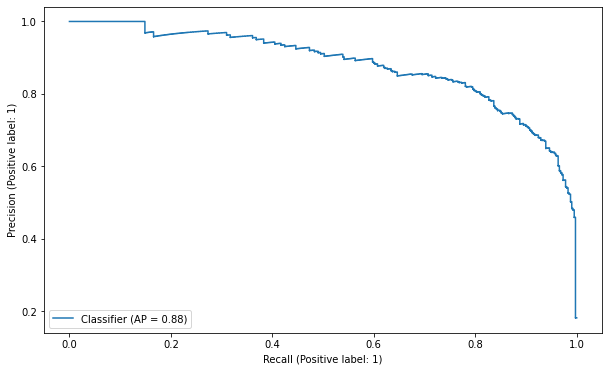

In [43]:
from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = model2.predict(val_ds)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [56]:
model2.save("BERT_model.h5")

In [63]:
# from tensorflow.keras.models import load_model
# model2 = load_model('/content/drive/MyDrive/NLP/BERT_model.h5')

y_pred_proba = model2.predict(val_ds)
y_pred = (y_pred_proba > 0.5).astype("int")
BERT_rec = recall_score(y_test, y_pred)
BERT_f1 = f1_score(y_test, y_pred)
BERT_AP = average_precision_score(y_test, y_pred_proba)

71/71 [==============================] - 4s 31ms/step


### Compare Models F1 Scores, Recall Scores and Average Precision Score

In [ ]:
compare = pd.DataFrame({"Model": ["LogReg_count", "LogReg_tfidf", "NaiveBayes_count", "NaiveBayes_tfidf", "SVM_count", "SVM_tfidf", "Random Forest_count", 
                                  "Random Forest_tfidf", "AdaBoost_count", "AdaBoost_tfidf", "DL_model", "BERT_model"],
                        
                        "F1_Score_Negative": [log_count_f1_neg, log_tfidf_f1_neg, nb_count_f1_neg, nb_tfidf_f1_neg, svc_count_f1_neg, svc_tfidf_f1_neg,
                                             rf_count_f1_neg, rf_tfidf_f1_neg, ada_count_f1_neg, ada_tfidf_f1_neg, DL_f1_neg, BERT_f1],  
                        
                        "Recall_Score_Negative": [log_count_rec_neg, log_tfidf_rec_neg, nb_count_rec_neg, nb_tfidf_rec_neg, svc_count_rec_neg,
                                                  svc_tfidf_rec_neg, rf_count_rec_neg, rf_tfidf_rec_neg, ada_count_rec_neg, ada_tfidf_rec_neg,
                                                  DL_rec_neg, BERT_rec],
                        
                        "Average_Precision_Score": [log_count_AP, log_tfidf_AP, nb_count_AP, nb_tfidf_AP, svc_count_AP, svc_tfidf_AP, rf_count_AP,
                                                          rf_tfidf_AP, ada_count_AP, ada_tfidf_AP, DL_AP, BERT_AP]})


In [138]:
compare.to_csv("Results.csv")
compare

,Model,F1_Score_Negative,Recall_Score_Negative,Average_Precision_Score
11,BERT_model,0.707855,0.978049,0.880776
10,DL_model,0.585292,0.941463,0.721986
1,LogReg_tfidf,0.698749,0.885366,0.764238
5,SVM_tfidf,0.686907,0.882927,0.751808
0,LogReg_count,0.691787,0.873171,0.709624
4,SVM_count,0.691120,0.873171,0.713600
6,Random Forest_count,0.646009,0.839024,0.656984
7,Random Forest_tfidf,0.631480,0.817073,0.653748
8,AdaBoost_count,0.629665,0.802439,0.651676
9,AdaBoost_tfidf,0.627151,0.800000,0.664687


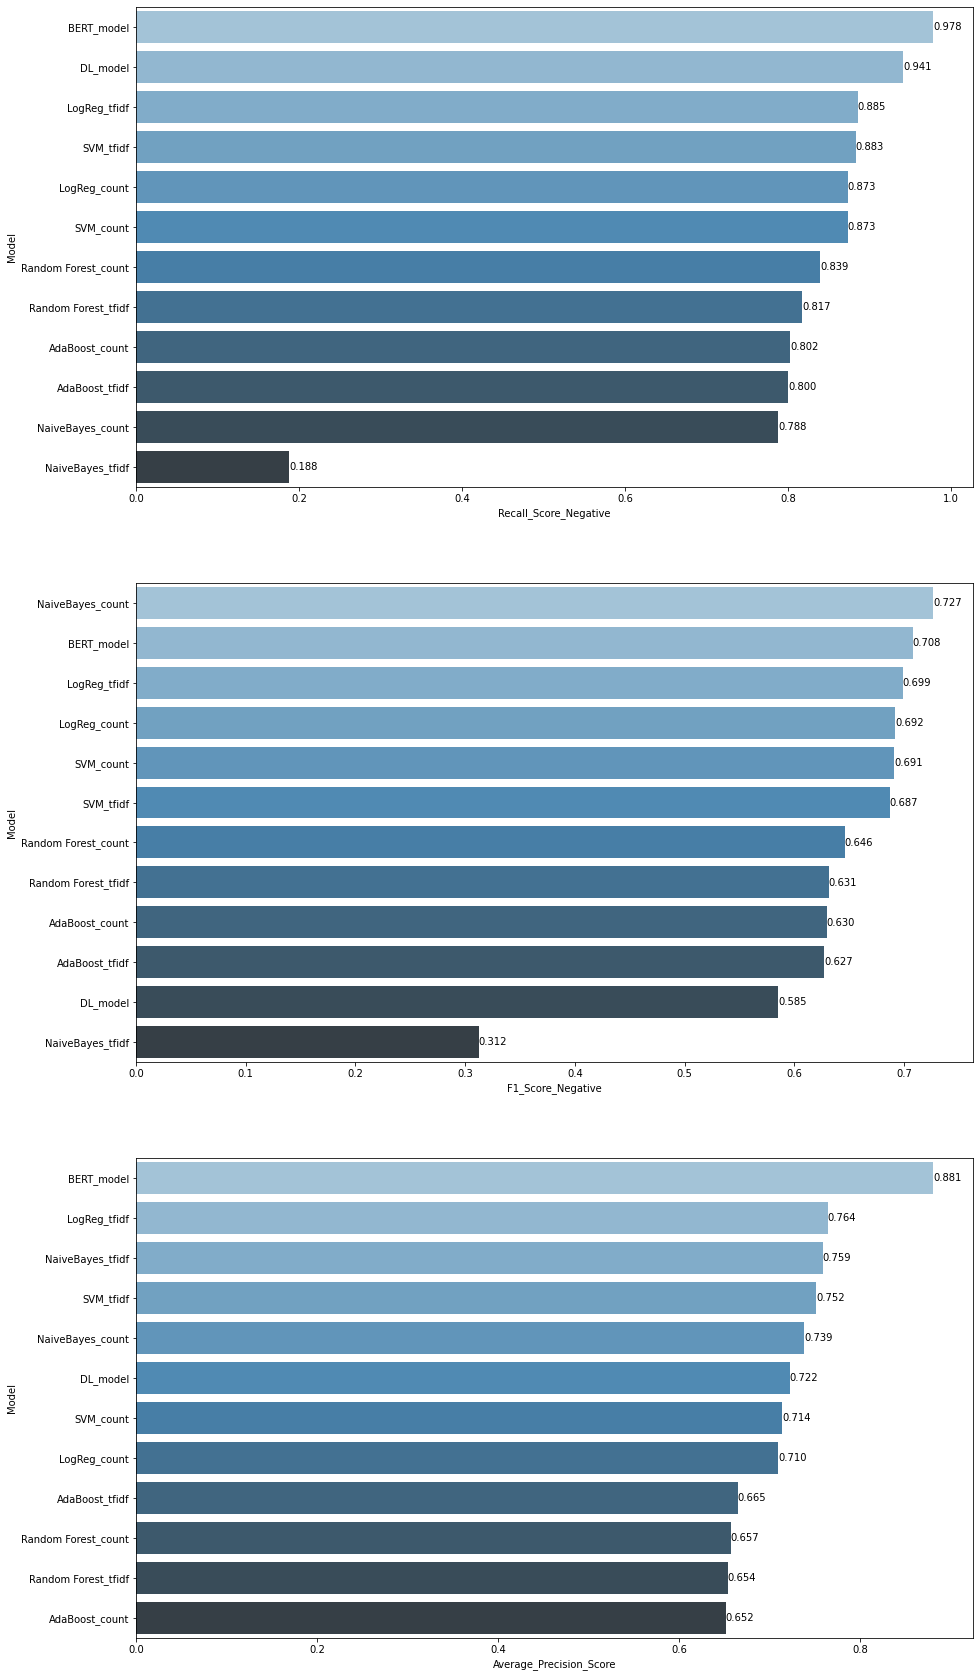

In [3]:

compare = pd.read_csv("Results.csv")
    
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score_Negative", ascending=False)
ax=sns.barplot(x="Recall_Score_Negative", y="Model", data=compare, palette="Blues_d")            
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score_Negative", ascending=False)
ax=sns.barplot(x="F1_Score_Negative", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax=sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();

### Conclusion